## Netflix movies and shows analyze

The program is using  Netflix TV Shows and Movies.csv  file that is fetched from kaggle

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_rows',300)

In [4]:
df = pd.read_csv('data/Netflix TV Shows and Movies.csv', index_col='index')

In [5]:
df

,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
index,,,,,,,,,,
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0
...,...,...,...,...,...,...,...,...,...,...
5278,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,tt14412240,5.8,26.0
5279,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,tt13857480,6.9,39.0
5280,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,tt14620732,6.5,32.0


In [6]:
df.shape # there are 5283 rows and 10 columns

(5283, 10)

In [7]:
df.columns # columns of this dataframe

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'imdb_id', 'imdb_score', 'imdb_votes'],
      dtype='object')

In [8]:
df.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       5273, 5274, 5275, 5276, 5277, 5278, 5279, 5280, 5281, 5282],
      dtype='int64', name='index', length=5283)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5283 entries, 0 to 5282
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5283 non-null   object 
 1   title              5283 non-null   object 
 2   type               5283 non-null   object 
 3   description        5278 non-null   object 
 4   release_year       5283 non-null   int64  
 5   age_certification  2998 non-null   object 
 6   runtime            5283 non-null   int64  
 7   imdb_id            5283 non-null   object 
 8   imdb_score         5283 non-null   float64
 9   imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 454.0+ KB


In [10]:
df.isnull().any()

id                   False
title                False
type                 False
description           True
release_year         False
age_certification     True
runtime              False
imdb_id              False
imdb_score           False
imdb_votes            True
dtype: bool

In [11]:
df[['title', 'description']] # display titles of moveis/shows with their description

,title,description
index,,
0,Taxi Driver,A mentally unstable Vietnam War veteran works ...
1,Monty Python and the Holy Grail,"King Arthur, accompanied by his squire, recrui..."
2,Life of Brian,"Brian Cohen is an average young Jewish man, bu..."
3,The Exorcist,12-year-old Regan MacNeil begins to adapt an e...
4,Monty Python's Flying Circus,A British sketch comedy series with the shows ...
...,...,...
5278,Momshies! Your Soul is Mine,Three women with totally different lives accid...
5279,Fine Wine,A beautiful love story that can happen between...
5280,Clash,A man from Nigeria returns to his family in Ca...


## Movies and Show
Firstly, display the total amounts of movies and shows and plot the bar chart.
Secondly,  display the percantage values of movies and shows and plot the pie chart. 

In [12]:
type_count = df["type"].value_counts()
type_labels = type_count.index.tolist() # labels of type column
print(type_labels)
type_counts = type_count.to_numpy()
type_counts # counts of each type

['MOVIE', 'SHOW']


array([3407, 1876], dtype=int64)

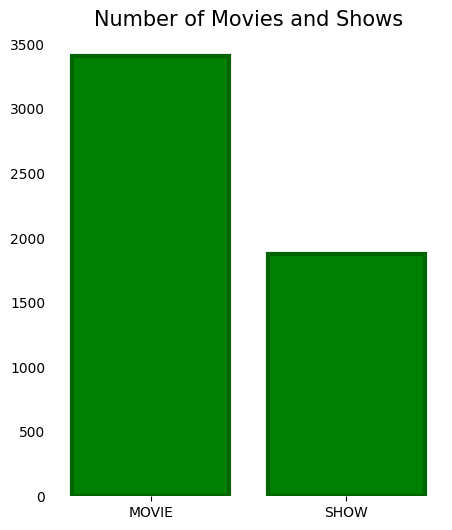

In [13]:
fig, ax = plt.subplots(figsize =(5, 6))
plt.title("Number of Movies and Shows", fontsize=15) # Writing a title 
ax.bar(type_labels, type_counts, color="green", edgecolor="darkgreen", linewidth=3) 

for bor in ['top', 'bottom', 'left', 'right']: # 
    ax.spines[bor].set_visible(False) # removing borders

ax.yaxis.set_ticks_position('none') # Removing ticks for Y axis

In [14]:
type_count = df["type"].value_counts(normalize=True)
print(type_labels)
type_percents = (type_count.to_numpy() * 100).round(2)
print(type_percents)

['MOVIE', 'SHOW']
[64.49 35.51]


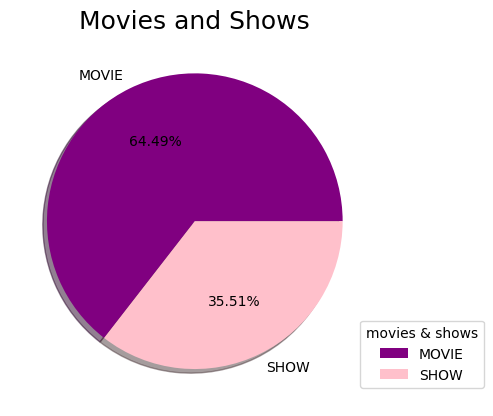

In [15]:
plt.title("Movies and Shows", fontsize=18) # სათაურად იმ კითხვის დაწერა, რომელზე გაცემულ პასუხებსაც განვიხილავთ
plt.pie(type_percents, labels=type_labels, shadow=True, colors=['purple', 'pink'], autopct="%1.2f%%", ) # წრიული დიაგრამის აგება
plt.legend(title="movies & shows",  bbox_to_anchor=(1.3,0.25))

In [16]:
df.head(10)

,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
index,,,,,,,,,,
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0
5,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,tt0066999,7.7,153463.0
6,tm185072,My Fair Lady,MOVIE,A snobbish phonetics professor agrees to a wag...,1964,G,170,tt0058385,7.8,94121.0
7,tm98978,The Blue Lagoon,MOVIE,Two small children and a ship's cook survive a...,1980,R,104,tt0080453,5.8,69053.0
8,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110,tt0061418,7.7,111189.0


## Distribution of Variable imdb_score
visualize the distribution of variable imdb_score

Text(0.5, 1.0, 'Distribution of Variable imdb_score')

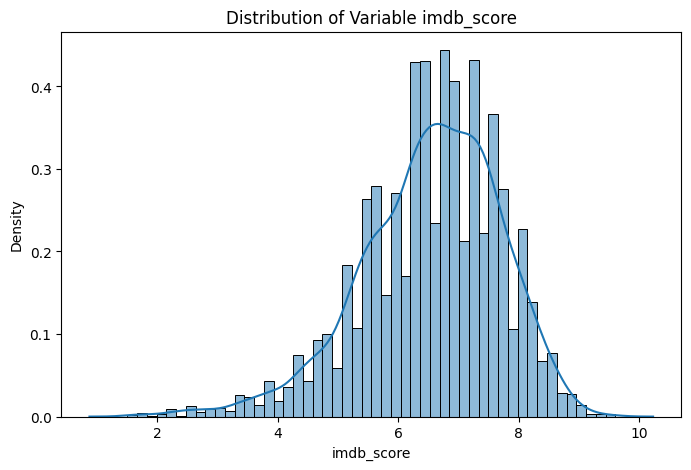

In [17]:
fig = plt.figure(figsize=(8, 5))
sns.histplot(df["imdb_score"], kde=True, stat="density", kde_kws=dict(cut=3), bins=50) 
plt.title("Distribution of Variable imdb_score")

In [18]:
print(f"IMDB Score: mean - {df['imdb_score'].mean()}, median - {df['imdb_score'].median()}") 

IMDB Score: mean - 6.5334469051675175, median - 6.6


Here we have mean 6.5334469051675175 and median 6.6 that shows as that becuase of outliers (shown in chart below)
there is some difference between mean and median but they are still close to each other. 
It is abvious that the distribution is left-skewed

<Axes: xlabel='imdb_score'>

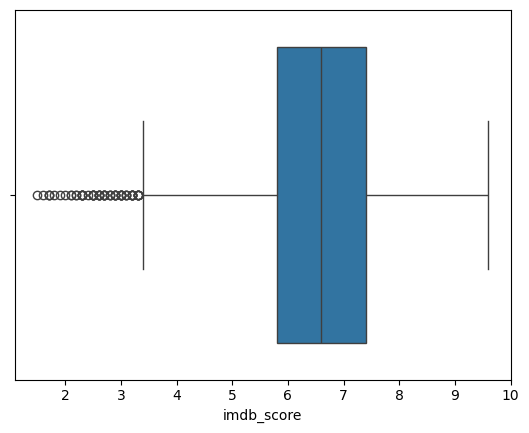

In [19]:
sns.boxplot(x = df["imdb_score"]) # plot the boxplot of variable imdb_score

## Movies from 20 century (229), that has more votes than the median of votes. 144 total.
The results are sort ascending by release year are descending by imdb votes

In [20]:
voted_median = df["imdb_votes"].median() # 2279

In [21]:
flt_score_year = (df["release_year"]<=2000)  & (df["imdb_votes"]>voted_median) # create the filter

In [22]:
df1 = df.loc[flt_score_year, ['title', 'type', 'release_year', 'imdb_score', 'imdb_votes']].sort_values(by=["release_year",
                                                                                                       "imdb_votes"],
                                                                                                   ascending=[True, False]) 
df1 # That's a new dataframe which contains title, type, release_year, imdb_score, imdb_votes and is filterd according to filter above 

,title,type,release_year,imdb_score,imdb_votes
index,,,,,
14,White Christmas,MOVIE,1954,7.5,42373.0
15,Cairo Station,MOVIE,1958,7.5,4385.0
10,The Guns of Navarone,MOVIE,1961,7.5,50150.0
19,Saladin the Victorious,MOVIE,1963,7.6,2470.0
6,My Fair Lady,MOVIE,1964,7.8,94121.0
9,The Professionals,MOVIE,1966,7.3,16168.0
8,Bonnie and Clyde,MOVIE,1967,7.7,111189.0
4,Monty Python's Flying Circus,SHOW,1969,8.8,72895.0
5,Dirty Harry,MOVIE,1971,7.7,153463.0


In [23]:
df1.reset_index(inplace=True)

In [24]:
df1.drop(columns="index", inplace=True)
df1

,title,type,release_year,imdb_score,imdb_votes
0,White Christmas,MOVIE,1954,7.5,42373.0
1,Cairo Station,MOVIE,1958,7.5,4385.0
2,The Guns of Navarone,MOVIE,1961,7.5,50150.0
3,Saladin the Victorious,MOVIE,1963,7.6,2470.0
4,My Fair Lady,MOVIE,1964,7.8,94121.0
5,The Professionals,MOVIE,1966,7.3,16168.0
6,Bonnie and Clyde,MOVIE,1967,7.7,111189.0
7,Monty Python's Flying Circus,SHOW,1969,8.8,72895.0
8,Dirty Harry,MOVIE,1971,7.7,153463.0
9,The Exorcist,MOVIE,1973,8.1,391942.0


In [25]:
release_year_counts = df1['release_year'].value_counts().sort_index(ascending=True)
release_years = release_year_counts.index.to_numpy()
release_years

films_numbers  =  release_year_counts.to_numpy()
print(films_numbers)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  3  2  2  3  2  3  1  3  2  5  4
  3  3 13 10 10  6 13 21 10 12]


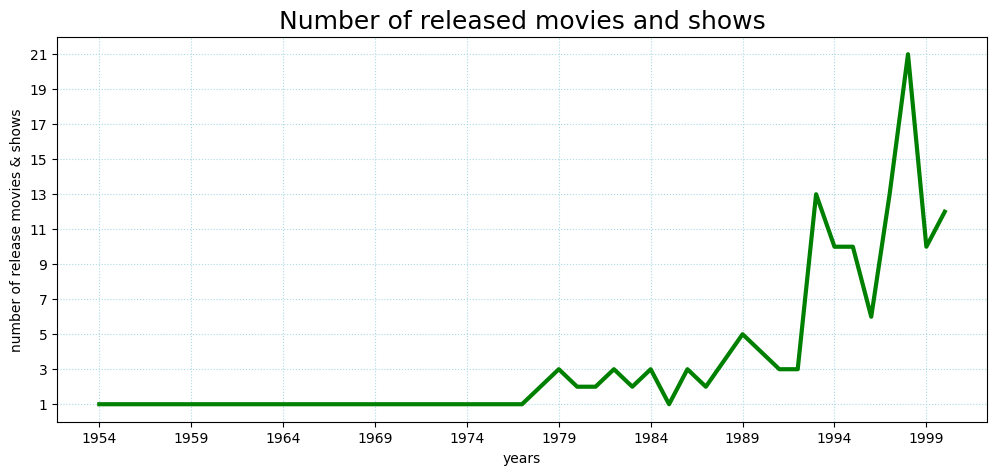

In [32]:
fig, ax = plt.subplots(figsize =(12, 5))
plt.title("Number of released movies and shows", fontsize=18) # high number of votes for each year in 20 century
ax.plot(release_years, films_numbers, 'g-', lw=3)
plt.xticks(np.arange(min(release_years), max(release_years), step=5))
plt.yticks(np.arange(min(films_numbers), max(films_numbers)+1, step=2))
plt.xlabel("years")
plt.ylabel("number of release movies & shows")
plt.grid(color="lightblue", linestyle=":")
plt.show()

## Average IMDB score for each year

In [27]:
imdb_count = dict()
imdb_sum = dict ()
imdb_avg = dict()
imdb_years = []
imdb_score_avgs = []

In [28]:
for ind, row in df.iterrows():
    release_year = row["release_year"]
    if release_year not in imdb_count: 
        imdb_count[release_year] = 1
        imdb_sum[release_year] = row["imdb_score"]
    else:
        imdb_count[release_year] +=  1
        imdb_sum[release_year] +=  row["imdb_score"]
# print(imdb_count)
# print(imdb_sum)
for k in imdb_sum.keys():
    imdb_avg[k] = imdb_sum[k] / imdb_count[k]
    # print(imdb_avg[k], end=" ")

In [29]:
imdb_avg = dict(sorted(imdb_avg.items()))
imdb_years = list(imdb_avg.keys()) # .to_numpy()
imdb_score_avgs = list(imdb_avg.values()) # .to_numpy()

In [30]:
# print(len(imdb_years))
# print(imdb_score_avgs)

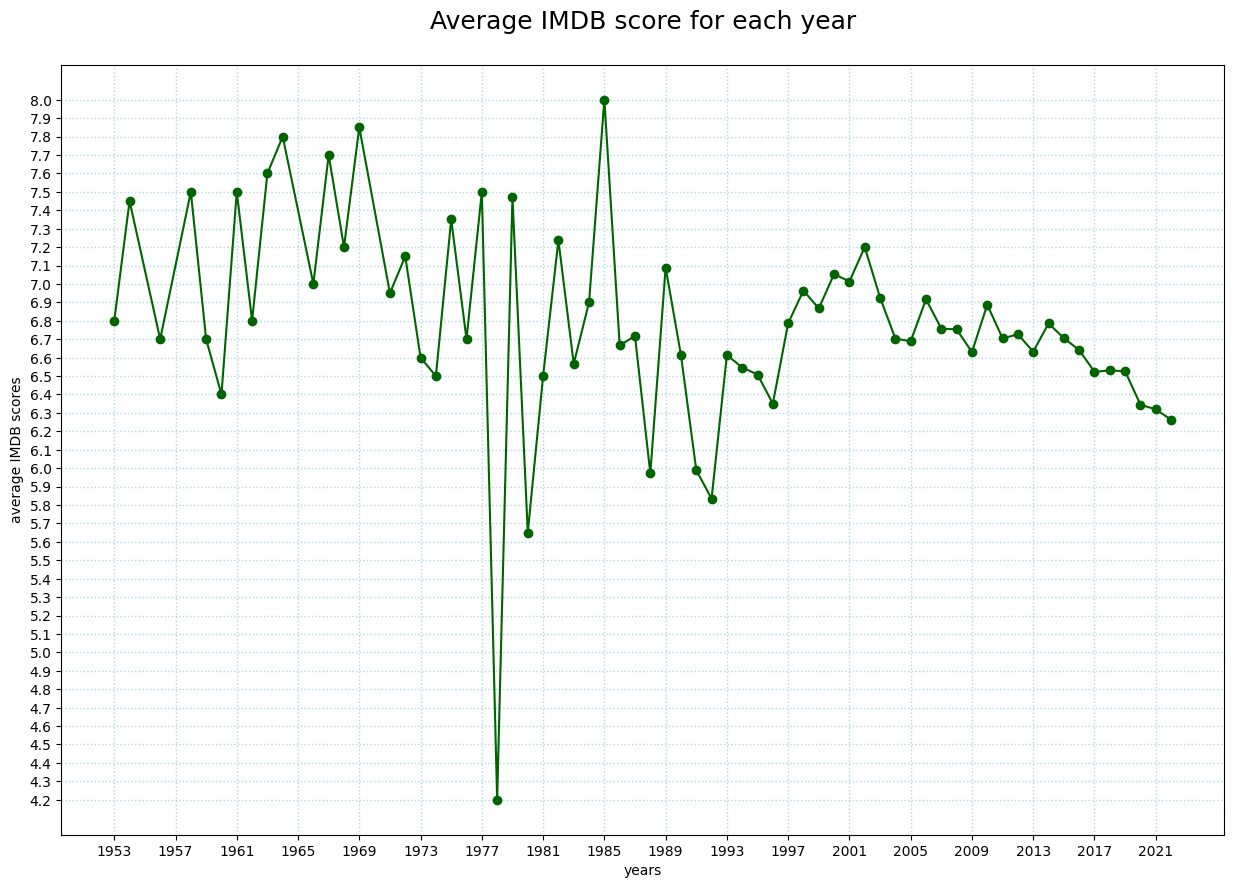

In [31]:
fig, ax = plt.subplots(figsize =(15, 10))
plt.title("Average IMDB score for each year\n", fontsize=18)
plt.plot(imdb_years, imdb_score_avgs, color="darkgreen",  marker='o')
plt.xticks(np.arange(min(imdb_years), max(imdb_years), step=4))
plt.yticks(np.arange(min(imdb_score_avgs), max(imdb_score_avgs)+0.1, step=0.1))
plt.xlabel("years")
plt.ylabel("average IMDB scores")
plt.grid(color="lightblue", linestyle=":", linewidth=1)

plt.show()